# Data Wrangling

In [117]:
import pandas as pd #for building pandas dataframes for analysis
import re #for parsing file names
import glob, os #for reading file names
import datetime # for tracking API call counts
import numpy as np
import nltk # for interpretation of text and text analysis
from sklearn.feature_extraction.text import CountVectorizer #for bag of words analysis
from nltk.corpus import stopwords # Import the stop word list
%matplotlib inline

In [2]:
#Reading CSV files in the DIR
file_names = []
file_names = glob.glob('*.csv')

In [3]:
#Verify that file names loaded correctly
print(file_names)

['test0.csv', 'test1.csv', 'test10.csv', 'test11.csv', 'test12.csv', 'test13.csv', 'test14.csv', 'test15.csv', 'test16.csv', 'test17.csv', 'test18.csv', 'test19.csv', 'test2.csv', 'test3.csv', 'test4.csv', 'test5.csv', 'test6.csv', 'test7.csv', 'test8.csv', 'test9.csv']


In [145]:
#Creating a list with all of the file names, searching for the last BID
counter = 0
for file in file_names :
    print(file)
    if counter == 0 :
        temp_df = pd.read_csv(file, index_col=False)
        #print('Initial temp_df')
    if counter > 0 :
        temp_df1 = pd.read_csv(file, index_col=False)
        temp_df = temp_df.append(temp_df1)
    counter += 1
print('DONE LOADING FILES')

test0.csv
test1.csv
test10.csv
test11.csv
test12.csv
test13.csv
test14.csv
test15.csv
test16.csv
test17.csv
test18.csv
test19.csv
test2.csv
test3.csv
test4.csv
test5.csv
test6.csv
test7.csv
test8.csv
test9.csv
DONE LOADING FILES


In [146]:
#reset index so that we do not have issues since we loaded multiple files 
temp_df = temp_df.reset_index()[['titles', 'timestamp']]

In [147]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
titles       2400 non-null object
timestamp    2400 non-null object
dtypes: object(2)
memory usage: 37.6+ KB


In [148]:
temp_df.shape

(2400, 2)

## Drop duplicates records

In [155]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2395 entries, 0 to 2399
Data columns (total 2 columns):
titles       2395 non-null object
timestamp    2395 non-null object
dtypes: object(2)
memory usage: 56.1+ KB


In [156]:
temp_df2 = temp_df.drop_duplicates()

In [157]:
temp_df2.shape

(2395, 2)

In [10]:
temp_df2.sort_values(by='titles').head()

,titles,timestamp
2303,!!! Free Couch !!!,2017-09-19 09:35
954,"""Gazelle"" glider exerciser GONE! to a good home!",2017-09-03 11:56
105,# # # #--- F R E E -- F I L L -- D I R T...,2017-10-04 10:55
2131,(update: already taken) Beautiful Piano - Free,2017-09-23 08:50
3,** Case\Cover for Samsung Galaxy S8 **,2017-10-04 20:54


In [11]:
#Converting timestamp to a true datetime64 format
temp_df2['timestamp'] = pd.to_datetime(temp_df2['timestamp'],infer_datetime_format=True)

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
temp_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2395 entries, 0 to 2399
Data columns (total 2 columns):
titles       2395 non-null object
timestamp    2395 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 56.1+ KB


In [13]:
temp_df2.sort_values(by='timestamp', ascending=True).head()

,titles,timestamp
1439,free dirt + sod/turf,2017-08-24 19:44:00
1438,Free couch,2017-08-24 20:24:00
1437,Spalding basketball hoop,2017-08-24 21:23:00
1436,Rocks,2017-08-24 21:38:00
1435,Southwestern Love Seat,2017-08-24 21:54:00


In [14]:
temp_df2.sort_values(by='timestamp', ascending=False).head()

,titles,timestamp
0,Free Marcy el 1 pro,2017-10-04 21:19:00
1,36 inch Sony Trinitron TV,2017-10-04 21:17:00
2,SCRAPPERS,2017-10-04 21:15:00
3,** Case\Cover for Samsung Galaxy S8 **,2017-10-04 20:54:00
4,Moving Boxes,2017-10-04 20:53:00


In [15]:
#Understanding the total amount of time for the postings
temp_df2['timestamp'].max() - temp_df2['timestamp'].min()

Timedelta('41 days 01:35:00')

In [16]:
# Convert titles to string type
temp_df2['titles'] = temp_df2['titles'].astype(str)

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
temp_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2395 entries, 0 to 2399
Data columns (total 2 columns):
titles       2395 non-null object
timestamp    2395 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 56.1+ KB


In [18]:
#Convert all characters to lower case
temp_df2['titles'] = temp_df2['titles'].str.lower()

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
#Convert titles to a list for analysis
titles_list = temp_df2['titles'].tolist()

In [32]:
#Filtering out all of the random characters
final_titles_list = []
for title in titles_list :
    title = re.sub('[^a-zA-Z]', ' ', title)
    #print(title)
    final_titles_list.append(title)

In [33]:
final_titles_list

['free marcy el   pro',
 '   inch sony trinitron tv',
 'scrappers',
 '   case cover for samsung galaxy s    ',
 'moving boxes',
 'free mirror ',
 'halogen shop light',
 'credenza',
 'cabinets',
 'curb alert',
 'free fire wood',
 'close up desk',
 'aquarium  lights and accessories',
 'free cardboard castle',
 'fridge stopped working',
 'futon mattress',
 'firewood',
 'free stuff westminster',
 'king size bed frame new in box unused',
 'electric fireplace   works on and off',
 'border pavers',
 'twin bed in unused new in box   no mattress or box springs',
 'year old horse manure stirred best in town',
 'styrofoam cooler with ice packs',
 'free  new  ds zelda decal',
 'free  vinyl mailers    ',
 'free  packing material',
 'free   books  books  books     boxes of mostly non fiction books',
 'moving boxes',
 'free   gallon buckets w  lids      gallon drums        value  free ',
 'true     ci treadmill',
 'pine roll top desk',
 'free loveseat',
 'free vintage borg bathroom scale  pink   vint

In [34]:
#Create custom stop word list
stoplist = stopwords.words('english')
stoplist.append('free')
print(stoplist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [35]:
new_titles_list10 = []
for title in final_titles_list:
    new_term_vector = []
    #print(title)
    for word in title.split():
        #print(word)
        if not word in stoplist:
            new_term_vector.append(word)
    new_titles_list10.append(new_term_vector)
new_titles_list10

[['marcy', 'el', 'pro'],
 ['inch', 'sony', 'trinitron', 'tv'],
 ['scrappers'],
 ['case', 'cover', 'samsung', 'galaxy'],
 ['moving', 'boxes'],
 ['mirror'],
 ['halogen', 'shop', 'light'],
 ['credenza'],
 ['cabinets'],
 ['curb', 'alert'],
 ['fire', 'wood'],
 ['close', 'desk'],
 ['aquarium', 'lights', 'accessories'],
 ['cardboard', 'castle'],
 ['fridge', 'stopped', 'working'],
 ['futon', 'mattress'],
 ['firewood'],
 ['stuff', 'westminster'],
 ['king', 'size', 'bed', 'frame', 'new', 'box', 'unused'],
 ['electric', 'fireplace', 'works'],
 ['border', 'pavers'],
 ['twin', 'bed', 'unused', 'new', 'box', 'mattress', 'box', 'springs'],
 ['year', 'old', 'horse', 'manure', 'stirred', 'best', 'town'],
 ['styrofoam', 'cooler', 'ice', 'packs'],
 ['new', 'ds', 'zelda', 'decal'],
 ['vinyl', 'mailers'],
 ['packing', 'material'],
 ['books', 'books', 'books', 'boxes', 'mostly', 'non', 'fiction', 'books'],
 ['moving', 'boxes'],
 ['gallon', 'buckets', 'w', 'lids', 'gallon', 'drums', 'value'],
 ['true', 'ci',

In [36]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = stoplist) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(final_titles_list)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

In [37]:
print(train_data_features.shape)

(2395, 1871)


In [38]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
#print(vocab)

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

1 ability
1 abs
1 academy
1 accent
1 accessories
1 accord
1 ad
1 adams
2 adhesive
1 adjustable
1 adult
1 affordable
1 afw
6 air
1 airline
1 al
2 album
43 alert
4 allen
8 alley
1 almost
1 alpaca
1 alpacas
1 already
2 aluminum
2 american
1 amount
1 amusement
2 animal
10 antique
1 anymore
2 anyone
1 applewood
1 appliance
4 appliances
1 approx
1 apprx
1 appx
1 apricot
3 aquarium
1 ar
1 arborist
3 area
4 arm
6 armchair
1 armoir
7 armoire
2 art
1 articles
1 artist
1 arts
3 asap
1 ash
2 aspen
1 attached
4 attn
1 aurora
1 aurra
1 automatic
8 available
1 ave
4 away
1 awesome
12 baby
4 back
1 backpack
1 backpacking
1 bad
2 bag
4 bags
1 bailey
1 baking
1 bales
2 ball
1 balm
1 bamboo
1 bankers
2 bar
2 barbecue
1 bare
2 barn
1 barrel
1 barstools
8 base
1 baseball
1 baseboard
2 basement
1 bases
1 basins
1 basis
7 basketball
1 bassett
3 bath
1 bathrm
11 bathroom
2 bathtub
2 batteries
1 battery
1 batting
1 bbq
1 bby
4 beautiful
1 beauty
2 beckett
33 bed
1 bedding
2 bedframe
1 bedrails
3 bedroom
2 beds

In [39]:
master_list = pd.DataFrame(
    {'Word': vocab,
     'Count': dist,
    })

In [125]:
master_list.sort_values(by='Count', ascending=False).head(10)

,Count,Word
1839,176,wood
379,163,couch
1732,114,tv
472,97,dirt
266,84,chair
176,81,boxes
1155,80,pallets
1415,71,scrap
456,69,desk
595,68,firewood


In [105]:
master_list.sort_values(by='Count', ascending=True).head(10)

,Count,Word
0,1,ability
1080,1,national
1079,1,name
1076,1,munchkin
1075,1,multiple
1074,1,multi
1072,1,mufflers
1071,1,mtn
1070,1,mths
1069,1,mtb


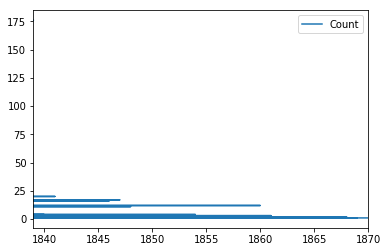

In [113]:
master_list.sort_values(by='Count', ascending=False).plot()
plt.show()

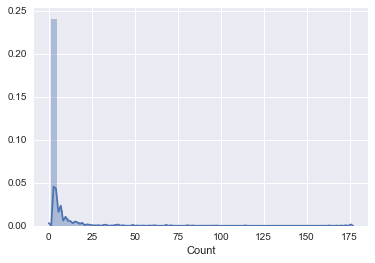

In [118]:
sns.distplot(master_list['Count'])

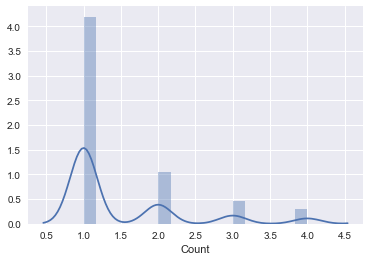

In [121]:
sns.distplot(master_list[master_list['Count'] < 5]['Count'])

In [120]:
master_list['Count'].describe()

count    1871.000000
mean        3.799572
std         9.784902
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       176.000000
Name: Count, dtype: float64

In [123]:
master_list[master_list['Count'] < 5]['Count'].describe()

count    1575.000000
mean        1.475556
std         0.835524
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Count, dtype: float64

## Word2Vec

In [43]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 10   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")
model = word2vec.Word2Vec(new_titles_list10, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "denver_craigslist_free"
model.save(model_name)
print("Model Complete!")

2017-10-18 16:56:46,048 : INFO : 'pattern' package not found; tag filters are not available for English
2017-10-18 16:56:46,069 : INFO : collecting all words and their counts
2017-10-18 16:56:46,071 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-10-18 16:56:46,074 : INFO : collected 1885 word types from a corpus of 7204 raw words and 2395 sentences
2017-10-18 16:56:46,075 : INFO : Loading a fresh vocabulary
2017-10-18 16:56:46,077 : INFO : min_count=10 retains 149 unique words (7% of original 1885, drops 1736)
2017-10-18 16:56:46,079 : INFO : min_count=10 leaves 3875 word corpus (53% of original 7204, drops 3329)
2017-10-18 16:56:46,080 : INFO : deleting the raw counts dictionary of 1885 items
2017-10-18 16:56:46,082 : INFO : sample=0.001 downsamples 127 most-common words
2017-10-18 16:56:46,083 : INFO : downsampling leaves estimated 1966 word corpus (50.7% of prior 3875)
2017-10-18 16:56:46,084 : INFO : estimated required memory for 149 words and 300 d

Training model...
Model Complete!


In [45]:
model.most_similar("wood")

[('cabinets', 0.26210448145866394),
 ('table', 0.2478516399860382),
 ('comfy', 0.24237652122974396),
 ('paper', 0.23392176628112793),
 ('great', 0.2292763888835907),
 ('books', 0.2258814424276352),
 ('full', 0.22402450442314148),
 ('w', 0.221186101436615),
 ('spring', 0.22085191309452057),
 ('big', 0.21741053462028503)]

In [50]:
model.doesnt_match("tv chair couch coffee".split())

'coffee'

In [48]:
model.most_similar("couch")

[('cabinets', 0.22250229120254517),
 ('chair', 0.22246190905570984),
 ('get', 0.20583955943584442),
 ('dining', 0.1991695761680603),
 ('hot', 0.19790630042552948),
 ('firewood', 0.173977792263031),
 ('computer', 0.16314435005187988),
 ('frame', 0.16200223565101624),
 ('kitchen', 0.1616145521402359),
 ('fridge', 0.15633969008922577)]

In [51]:
from sklearn.cluster import KMeans
import time

start = time.time() # Start time

# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster
word_vectors = model.wv.syn0
num_clusters = word_vectors.shape[0] // 5

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")

Time taken for K Means clustering:  0.14358830451965332 seconds.


In [52]:
# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number                                                                                            
word_centroid_map = dict(zip( model.wv.index2word, idx ))

In [53]:
word_centroid_map

{'alert': 16,
 'antique': 2,
 'baby': 23,
 'bathroom': 17,
 'bed': 17,
 'big': 28,
 'black': 5,
 'books': 28,
 'bookshelf': 2,
 'box': 3,
 'boxes': 13,
 'broken': 25,
 'brown': 15,
 'cabinet': 18,
 'cabinets': 16,
 'center': 7,
 'chair': 8,
 'chairs': 5,
 'chips': 10,
 'clean': 15,
 'clothes': 2,
 'coffee': 16,
 'come': 2,
 'comfy': 28,
 'computer': 8,
 'concrete': 22,
 'condition': 8,
 'couch': 8,
 'couches': 24,
 'curb': 24,
 'desk': 5,
 'dining': 8,
 'dirt': 10,
 'dishwasher': 22,
 'door': 12,
 'doors': 26,
 'dresser': 7,
 'entertainment': 17,
 'etc': 11,
 'fence': 20,
 'file': 16,
 'filing': 14,
 'fill': 22,
 'fire': 19,
 'firewood': 8,
 'frame': 6,
 'fridge': 28,
 'full': 3,
 'furniture': 4,
 'futon': 1,
 'gallon': 28,
 'garage': 10,
 'get': 8,
 'glass': 2,
 'gone': 9,
 'good': 10,
 'great': 28,
 'grill': 25,
 'heater': 21,
 'home': 1,
 'hot': 22,
 'inch': 24,
 'items': 18,
 'kids': 5,
 'king': 18,
 'kitchen': 16,
 'large': 10,
 'lava': 28,
 'leather': 25,
 'logs': 4,
 'lots': 15,

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words=stoplist)
X = vectorizer.fit_transform(final_titles_list)
 
true_k = 5

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
 
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

centroids = model.cluster_centers_
labels = model.labels_

#print(centroids)
#print(labels)

Top terms per cluster:
Cluster 0:
 pallets
 wood
 wooden
 firewood
 hundreds
 plastic
 scrap
 fire
 sized
 crates
Cluster 1:
 grill
 propane
 great
 scrap
 charbroil
 brinkman
 camping
 stainless
 gas
 barbecue
Cluster 2:
 couch
 leather
 loveseat
 reclining
 brown
 recliner
 chair
 seat
 love
 ottoman
Cluster 3:
 wood
 tv
 dirt
 firewood
 boxes
 chair
 moving
 desk
 fill
 stuff
Cluster 4:
 scrap
 metal
 water
 heater
 wood
 desk
 lumber
 firewood
 washer
 hot


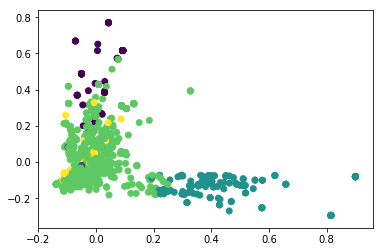

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
Y = pipeline.fit_transform(final_titles_list).todense()

pca = PCA(n_components=2).fit(Y)
data2D = pca.transform(Y)
plt.scatter(data2D[:,0], data2D[:,1], c=labels)
plt.show()              #not required if using ipython notebook

## Final Machine Learning